In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('orange_cap.csv')


In [3]:
print("Columns:", df.columns.tolist())
print("Shape (rows, columns):", df.shape)

Columns: ['Position', 'Batsman', 'Type', 'Team', 'Matches', 'Innings', 'Not_out', 'Runs', 'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds', 'Fifties', 'Ducks', 'Fours', 'Sixes', 'Images']
Shape (rows, columns): (41, 18)


In [4]:
df = df.fillna(0)

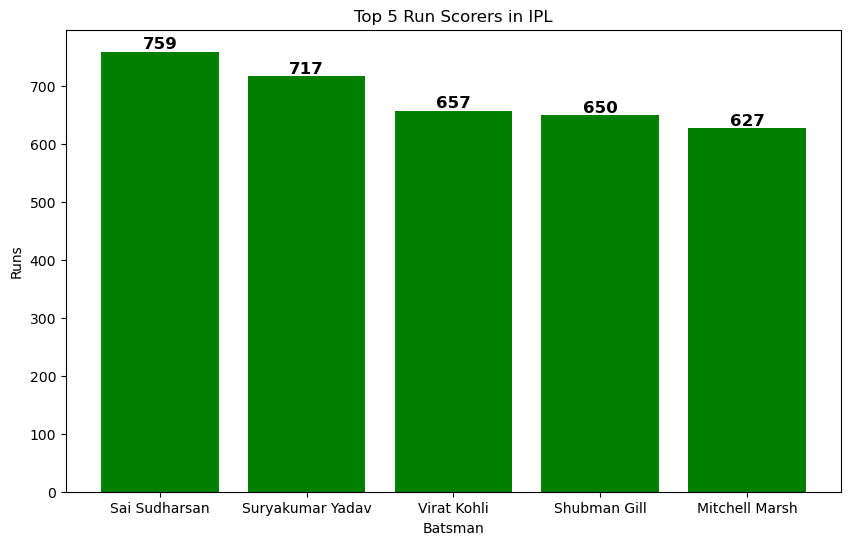

In [5]:
top5 = df.sort_values(by='Runs', ascending=False).head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(top5['Batsman'], top5['Runs'], color='green')
plt.title('Top 5 Run Scorers in IPL')
plt.xlabel('Batsman')
plt.ylabel('Runs')

# Add value labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.show()

In [6]:
# Top 5 batsmen with highest average
top5_avg = df.sort_values(by='Average', ascending=False).head(5)
print("Top 5 Batsmen with Highest Average:")
for idx, row in top5_avg.iterrows():
    print(f"{row['Batsman']} - {row['Average']:.2f} average")

Top 5 Batsmen with Highest Average:
Suryakumar Yadav - 65.18 average
Jos Buttler - 59.77 average
Virat Kohli - 54.75 average
Sai Sudharsan - 54.21 average
KL Rahul - 53.90 average


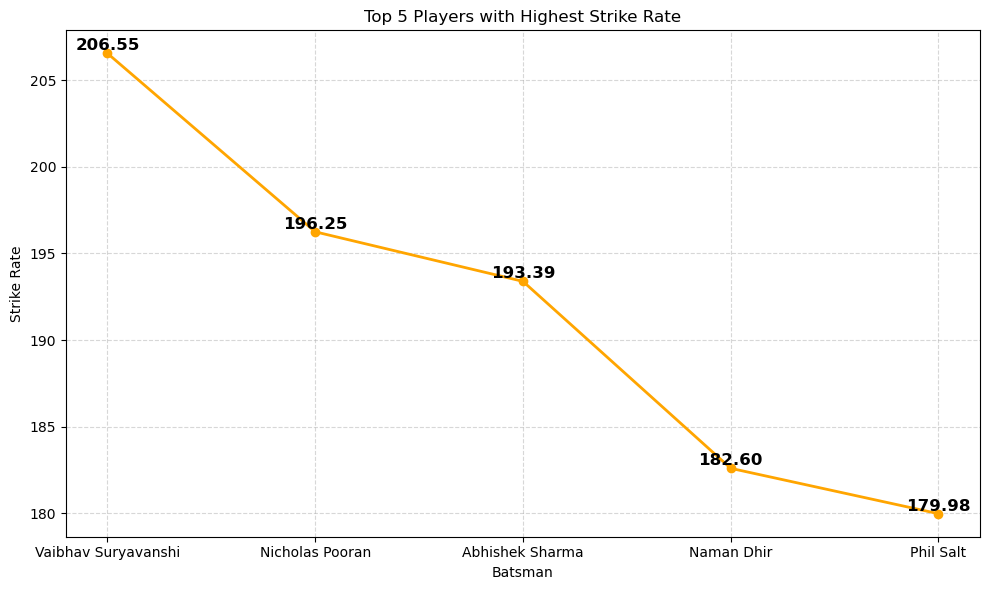

In [7]:
top5_sr = df.sort_values(by='Strike_rate', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.plot(top5_sr['Batsman'], top5_sr['Strike_rate'], marker='o', color='orange', linewidth=2)
plt.title('Top 5 Players with Highest Strike Rate')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')

# Add value labels on points
for i, sr in enumerate(top5_sr['Strike_rate']):
    plt.text(i, sr, f'{sr:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Top 5 Run Scorers (Middle Order):
Shreyas Iyer - 604 runs
Heinrich Klaasen - 487 runs
Riyan Parag - 393 runs
Nehal Wadhera - 369 runs
Shivam Dube - 357 runs


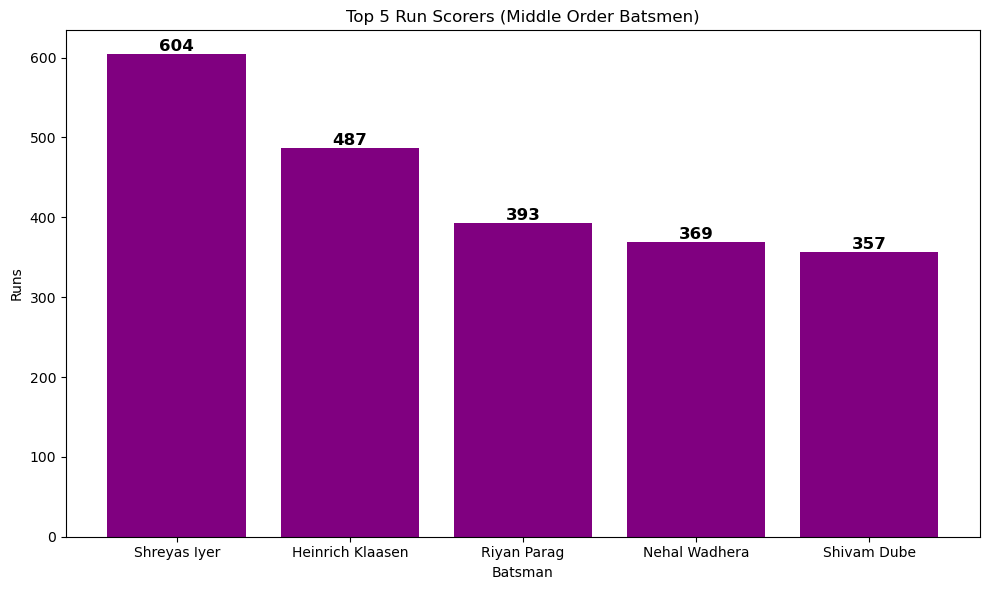

In [8]:
middle_order = df[df['Type'] == 'Middle Order']

# Get top 5 run scorers among Middle Order batsmen
top5_middle_order = middle_order.sort_values(by='Runs', ascending=False).head(5)

print("Top 5 Run Scorers (Middle Order):")
for idx, row in top5_middle_order.iterrows():
    print(f"{row['Batsman']} - {int(row['Runs'])} runs")
    
plt.figure(figsize=(10, 6))
bars = plt.bar(top5_middle_order['Batsman'], top5_middle_order['Runs'], color='purple')
plt.title('Top 5 Run Scorers (Middle Order Batsmen)')
plt.xlabel('Batsman')
plt.ylabel('Runs')

# Add value labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [9]:
df = pd.read_csv('purple_cap.csv')

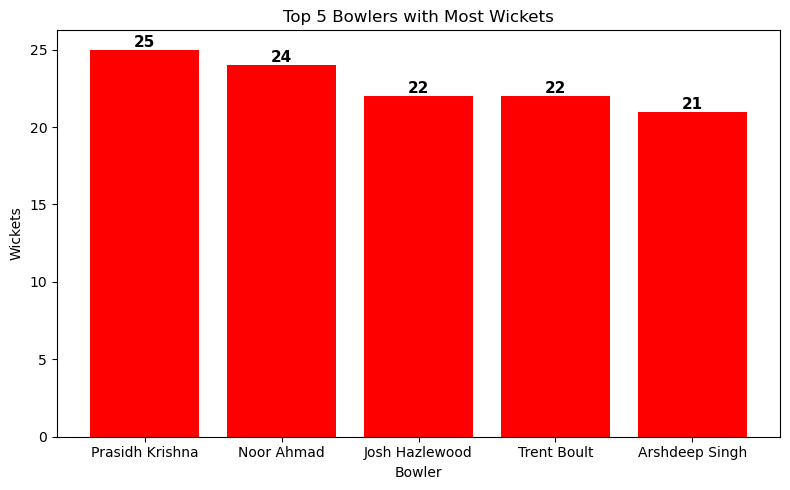

In [10]:
top5_wickets = df.sort_values(by='Wickets', ascending=False).head(5)
plt.figure(figsize=(8, 5))
bars = plt.bar(top5_wickets['Bowler'], top5_wickets['Wickets'], color='red')
plt.title('Top 5 Bowlers with Most Wickets')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()


In [22]:
df = pd.read_csv('purple_cap.csv')
df['Economy_rate'] = pd.to_numeric(df['Economy_rate'], errors='coerce')
top5_economy = df.sort_values(by='Economy_rate', ascending=True).head(5)
print(top5_economy[['Bowler', 'Economy_rate']])


                Bowler  Economy_rate
6       Jasprit Bumrah          6.67
16       Kuldeep Yadav          7.07
7   Varun Chakravarthy          7.66
1           Noor Ahmad          8.16
8        Krunal Pandya          8.23


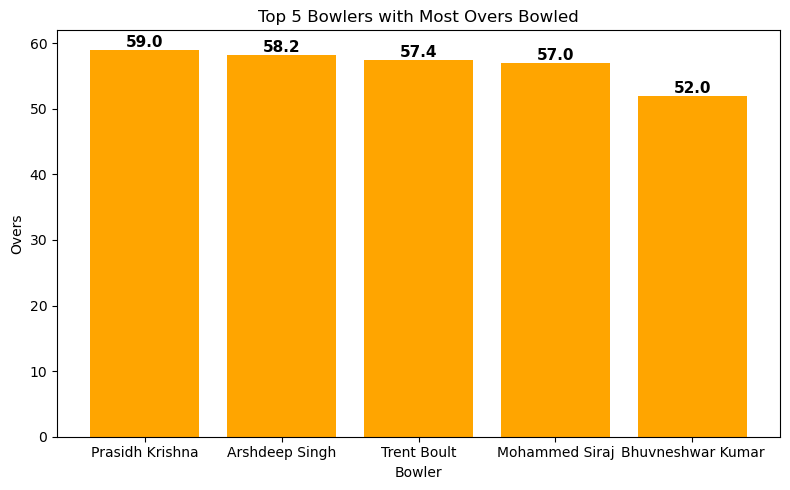

In [12]:
df['Overs'] = pd.to_numeric(df['Overs'], errors='coerce')
top5_overs = df.sort_values(by='Overs', ascending=False).head(5)
plt.figure(figsize=(8, 5))
bars = plt.bar(top5_overs['Bowler'], top5_overs['Overs'], color='orange')
plt.title('Top 5 Bowlers with Most Overs Bowled')
plt.xlabel('Bowler')
plt.ylabel('Overs')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

In [13]:
df = pd.read_csv('matches.csv')

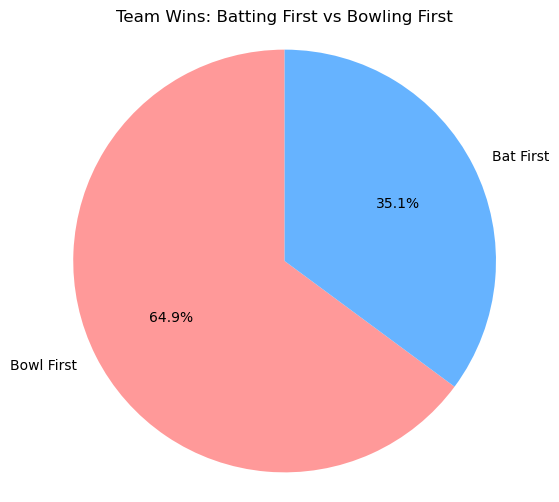

In [14]:
def win_type(row):
    if row['toss_winner'] == row['match_winner']:
        # Toss winner won, so their toss decision applies
        return 'Bat First' if row['toss_decision'].lower() == 'bat' else 'Bowl First'
    else:
        # Toss loser won, infer from who batted first
        if row['match_winner'] == row['team1']:
            return 'Bat First'
        else:
            return 'Bowl First'

df['win_type'] = df.apply(win_type, axis=1)

# Count total wins by win type
win_counts = df['win_type'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Team Wins: Batting First vs Bowling First')
plt.axis('equal')
plt.show()

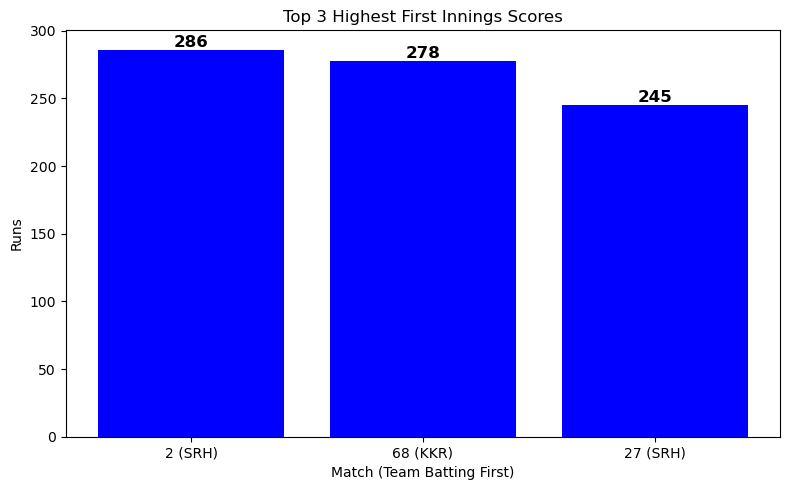

In [15]:
# Top 3 highest first innings scores
top3_first = df.sort_values(by='first_ings_score', ascending=False).head(3)

plt.figure(figsize=(8,5))
bars1 = plt.bar(top3_first['match_id'].astype(str) + " (" + top3_first['team1'] + ")", top3_first['first_ings_score'], color='blue')
plt.title('Top 3 Highest First Innings Scores')
plt.xlabel('Match (Team Batting First)')
plt.ylabel('Runs')
for bar, team in zip(bars1, top3_first['team1']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

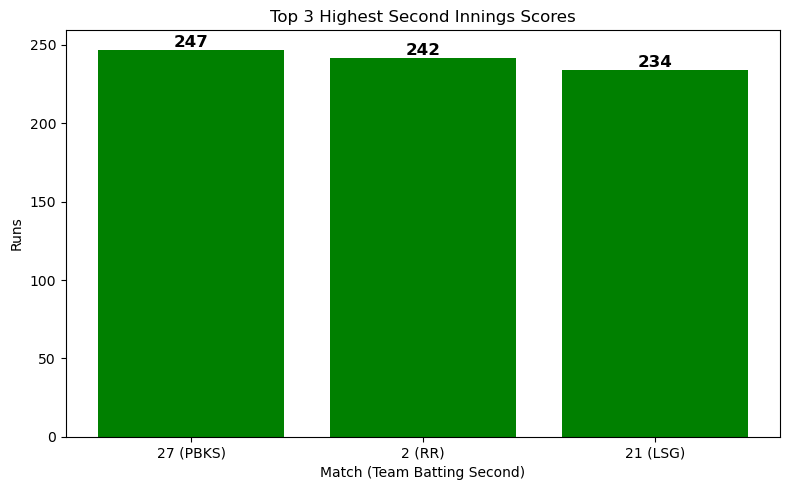

In [16]:
top3_second = df.sort_values(by='second_ings_score', ascending=False).head(3)

plt.figure(figsize=(8,5))
bars2 = plt.bar(top3_second['match_id'].astype(str) + " (" + top3_second['team2'] + ")", top3_second['second_ings_score'], color='green')
plt.title('Top 3 Highest Second Innings Scores')
plt.xlabel('Match (Team Batting Second)')
plt.ylabel('Runs')
for bar, team in zip(bars2, top3_second['team2']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:


# Load data
bat_df = pd.read_csv('orange_cap.csv')
bowl_df = pd.read_csv('purple_cap.csv')

# Convert columns to numeric
bat_df['Strike_rate'] = pd.to_numeric(bat_df['Strike_rate'], errors='coerce')
bat_df['Runs'] = pd.to_numeric(bat_df['Runs'], errors='coerce')
bowl_df['Wickets'] = pd.to_numeric(bowl_df['Wickets'], errors='coerce')
bowl_df['Economy_rate'] = pd.to_numeric(bowl_df['Economy_rate'], errors='coerce')
bowl_df['Strike Rate'] = pd.to_numeric(bowl_df['Strike Rate'], errors='coerce')

# 1-3: Top order batsmen, SR >= 140
top_order = bat_df[(bat_df['Type'] == 'Top Order') & (bat_df['Strike_rate'] >= 140)]
top_3_top_order = top_order.sort_values(by='Runs', ascending=False).head(3)

# 4-7: Middle order batsmen, SR >= 170
middle_order = bat_df[(bat_df['Type'] == 'Middle Order') & (bat_df['Strike_rate'] >= 170)]
top_4_middle_order = middle_order.sort_values(by='Runs', ascending=False).head(4)

# 8-9: Spin bowlers with most wickets
spin_keywords = ['Chahal', 'Kishore', 'Narine', 'Kuldeep', 'Hasaranga', 'Varun', 'Jadeja', 'Santner', 'Rashid', 'Zampa', 'Ashwin', 'Noor', 'Stubbs']
spin_bowlers = bowl_df[bowl_df['Bowler'].str.contains('|'.join(spin_keywords), case=False, na=False)]
top_2_spinners = spin_bowlers.sort_values(by='Wickets', ascending=False).head(2)

# 10: Seam bowler with least economy
seam_keywords = ['Singh', 'Hazlewood', 'Boult', 'Krishna', 'Patel', 'Jansen', 'Siraj', 'Arora', 'Bumrah', 'Pandya', 'Kumar', 'Cummins', 'Starc', 'Unadkat', 'Omarzai', 'Thakur', 'Avesh', 'Curran', 'Arshdeep', 'Harshit', 'Harshal', 'O\'Rourke', 'Deshpande', 'Ferguson', 'Malinga', 'Ngidi', 'Santner', 'Rahman', 'Theekshana']
seam_bowlers = bowl_df[bowl_df['Bowler'].str.contains('|'.join(seam_keywords), case=False, na=False)]
seam_least_eco = seam_bowlers.sort_values(by='Economy_rate', ascending=True).head(1)

# 11: Seam bowler with most wickets
seam_most_wickets = seam_bowlers.sort_values(by='Wickets', ascending=False).head(1)

# 12: Seam bowler with best average (lowest Strike Rate)
seam_best_avg = seam_bowlers.sort_values(by='Strike Rate', ascending=True).head(1)

# Remove duplicates among seamers
seamers = pd.concat([seam_least_eco, seam_most_wickets, seam_best_avg]).drop_duplicates(subset=['Bowler']).head(3)

# Assemble Playing 11
playing11 = pd.concat([
    top_3_top_order[['Batsman', 'Team', 'Runs', 'Strike_rate', 'Type']],
    top_4_middle_order[['Batsman', 'Team', 'Runs', 'Strike_rate', 'Type']],
    top_2_spinners[['Bowler', 'Team', 'Wickets', 'Economy_rate']],
    seamers[['Bowler', 'Team', 'Wickets', 'Economy_rate', 'Strike Rate']]
], ignore_index=True)

print("Best Playing 11:\n", playing11)

# Impact Players
# 2 best batsmen not in playing 11
used_batsmen = set(top_3_top_order['Batsman']).union(set(top_4_middle_order['Batsman']))

impact_top_order = bat_df[
    (bat_df['Type'] == 'Top Order') &
    (~bat_df['Batsman'].isin(used_batsmen))
].sort_values(by='Runs', ascending=False).head(1)[['Batsman', 'Team', 'Runs', 'Strike_rate']]

impact_middle_order = bat_df[
    (bat_df['Type'] == 'Middle Order') &
    (~bat_df['Batsman'].isin(used_batsmen))
].sort_values(by='Runs', ascending=False).head(1)[['Batsman', 'Team', 'Runs', 'Strike_rate']]

# 1 best spinner not in playing 11
used_spinners = set(top_2_spinners['Bowler'])
impact_spinner = spin_bowlers[~spin_bowlers['Bowler'].isin(used_spinners)].sort_values(by='Wickets', ascending=False).head(1)[['Bowler', 'Team', 'Wickets', 'Economy_rate']]

# 2 best seamers not in playing 11
used_seamers = set(seamers['Bowler'])
impact_seamers = seam_bowlers[~seam_bowlers['Bowler'].isin(used_seamers)].sort_values(by='Wickets', ascending=False).head(2)[['Bowler', 'Team', 'Wickets', 'Economy_rate']]

print("\nImpact Players:\n", pd.concat([impact_batsmen, impact_spinner, impact_seamers], ignore_index=True))

print("\nPlaying 11 Names Only:")
for name in playing11['Batsman'].fillna('').tolist() + playing11['Bowler'].fillna('').tolist():
    if name: print(name)

print("\nImpact Player Names Only:")
for name in impact_batsmen['Batsman'].fillna('').tolist() + \
           impact_spinner['Bowler'].fillna('').tolist() + \
           impact_seamers['Bowler'].fillna('').tolist():
    if name: print(name)

Best Playing 11:
              Batsman  Team   Runs  Strike_rate          Type           Bowler  \
0      Sai Sudharsan    GT  759.0       156.17     Top Order              NaN   
1   Suryakumar Yadav    MI  717.0       167.91     Top Order              NaN   
2        Virat Kohli   RCB  657.0       144.71     Top Order              NaN   
3       Shreyas Iyer  PBKS  604.0       175.07  Middle Order              NaN   
4   Heinrich Klaasen   SRH  487.0       172.69  Middle Order              NaN   
5      Jitesh Sharma   RCB  261.0       176.35  Middle Order              NaN   
6         Naman Dhir    MI  252.0       182.60  Middle Order              NaN   
7                NaN   CSK    NaN          NaN           NaN       Noor Ahmad   
8                NaN    GT    NaN          NaN           NaN      Sai Kishore   
9                NaN    MI    NaN          NaN           NaN   Jasprit Bumrah   
10               NaN    GT    NaN          NaN           NaN  Prasidh Krishna   
11        